# Feature Engineering & Feature Extraction

## Attaching Resources

### Importing Necessary Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [21]:
bf = pd.read_csv('EDA.csv')
bf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
99996,1003503,P00296342,1,2,4,1,0,0,8,8.0,16.0,7824
99997,1003503,P00227842,1,2,4,1,0,0,2,5.0,16.0,13235
99998,1003503,P00315842,1,2,4,1,0,0,5,8.0,16.0,7085
99999,1003503,P00344842,1,2,4,1,0,0,5,8.0,16.0,7012


## Splitting The Data Into Target and Independent set

In [22]:
x = bf.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = bf['Purchase']

In [23]:
x

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,0,2,0,3,8.0,16.0
1,0,1,10,0,2,0,1,6.0,14.0
2,0,1,10,0,2,0,12,8.0,16.0
3,0,1,10,0,2,0,12,14.0,16.0
4,1,7,16,2,4,0,8,8.0,16.0
...,...,...,...,...,...,...,...,...,...
99996,1,2,4,1,0,0,8,8.0,16.0
99997,1,2,4,1,0,0,2,5.0,16.0
99998,1,2,4,1,0,0,5,8.0,16.0
99999,1,2,4,1,0,0,5,8.0,16.0


### Performing Feature Selection

#### Performing Mutual Info

In [24]:
mutual_scores = mutual_info_regression(x, y)
mutual_scores

array([6.92840540e-03, 1.92489142e-03, 7.19648838e-03, 3.66694609e-03,
       6.32292916e-04, 0.00000000e+00, 1.62805395e+00, 4.56250134e-01,
       1.95181577e-01])

In [26]:
mutual_info_test = pd.DataFrame(mutual_scores).T
mutual_info_test.columns = x.columns

mutual_info_test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.006928,0.001925,0.007196,0.003667,0.000632,0.0,1.628054,0.45625,0.195182


#### Performing Tree Based method

In [27]:
dt = DecisionTreeRegressor()
dt.fit(x,y)

DecisionTreeRegressor()

In [28]:
dt.feature_importances_

array([0.01647442, 0.04467516, 0.07249025, 0.01914762, 0.04664185,
       0.02094047, 0.73134901, 0.02857316, 0.01970805])

### Performing Extra Trees Regressor

In [29]:
et = ExtraTreesRegressor()
et.fit(x,y)

ExtraTreesRegressor()

In [30]:
et.feature_importances_

array([0.01043415, 0.04451036, 0.08542691, 0.01251305, 0.04832757,
       0.01455138, 0.67155424, 0.07200291, 0.04067943])

In [31]:
imp_cols = pd.DataFrame({
    'Features' : x.columns,
    'MI' : mutual_scores,
    'IG' : dt.feature_importances_,
    'ET' : et.feature_importances_
})

imp_cols

,Features,MI,IG,ET
0,Gender,0.006928,0.016474,0.010434
1,Age,0.001925,0.044675,0.044510
2,Occupation,0.007196,0.072490,0.085427
3,City_Category,0.003667,0.019148,0.012513
4,Stay_In_Current_City_Years,0.000632,0.046642,0.048328
5,Marital_Status,0.000000,0.020940,0.014551
6,Product_Category_1,1.628054,0.731349,0.671554
7,Product_Category_2,0.456250,0.028573,0.072003
8,Product_Category_3,0.195182,0.019708,0.040679


### Compairing All Result

<Axes: xlabel='Features', ylabel='MI'>

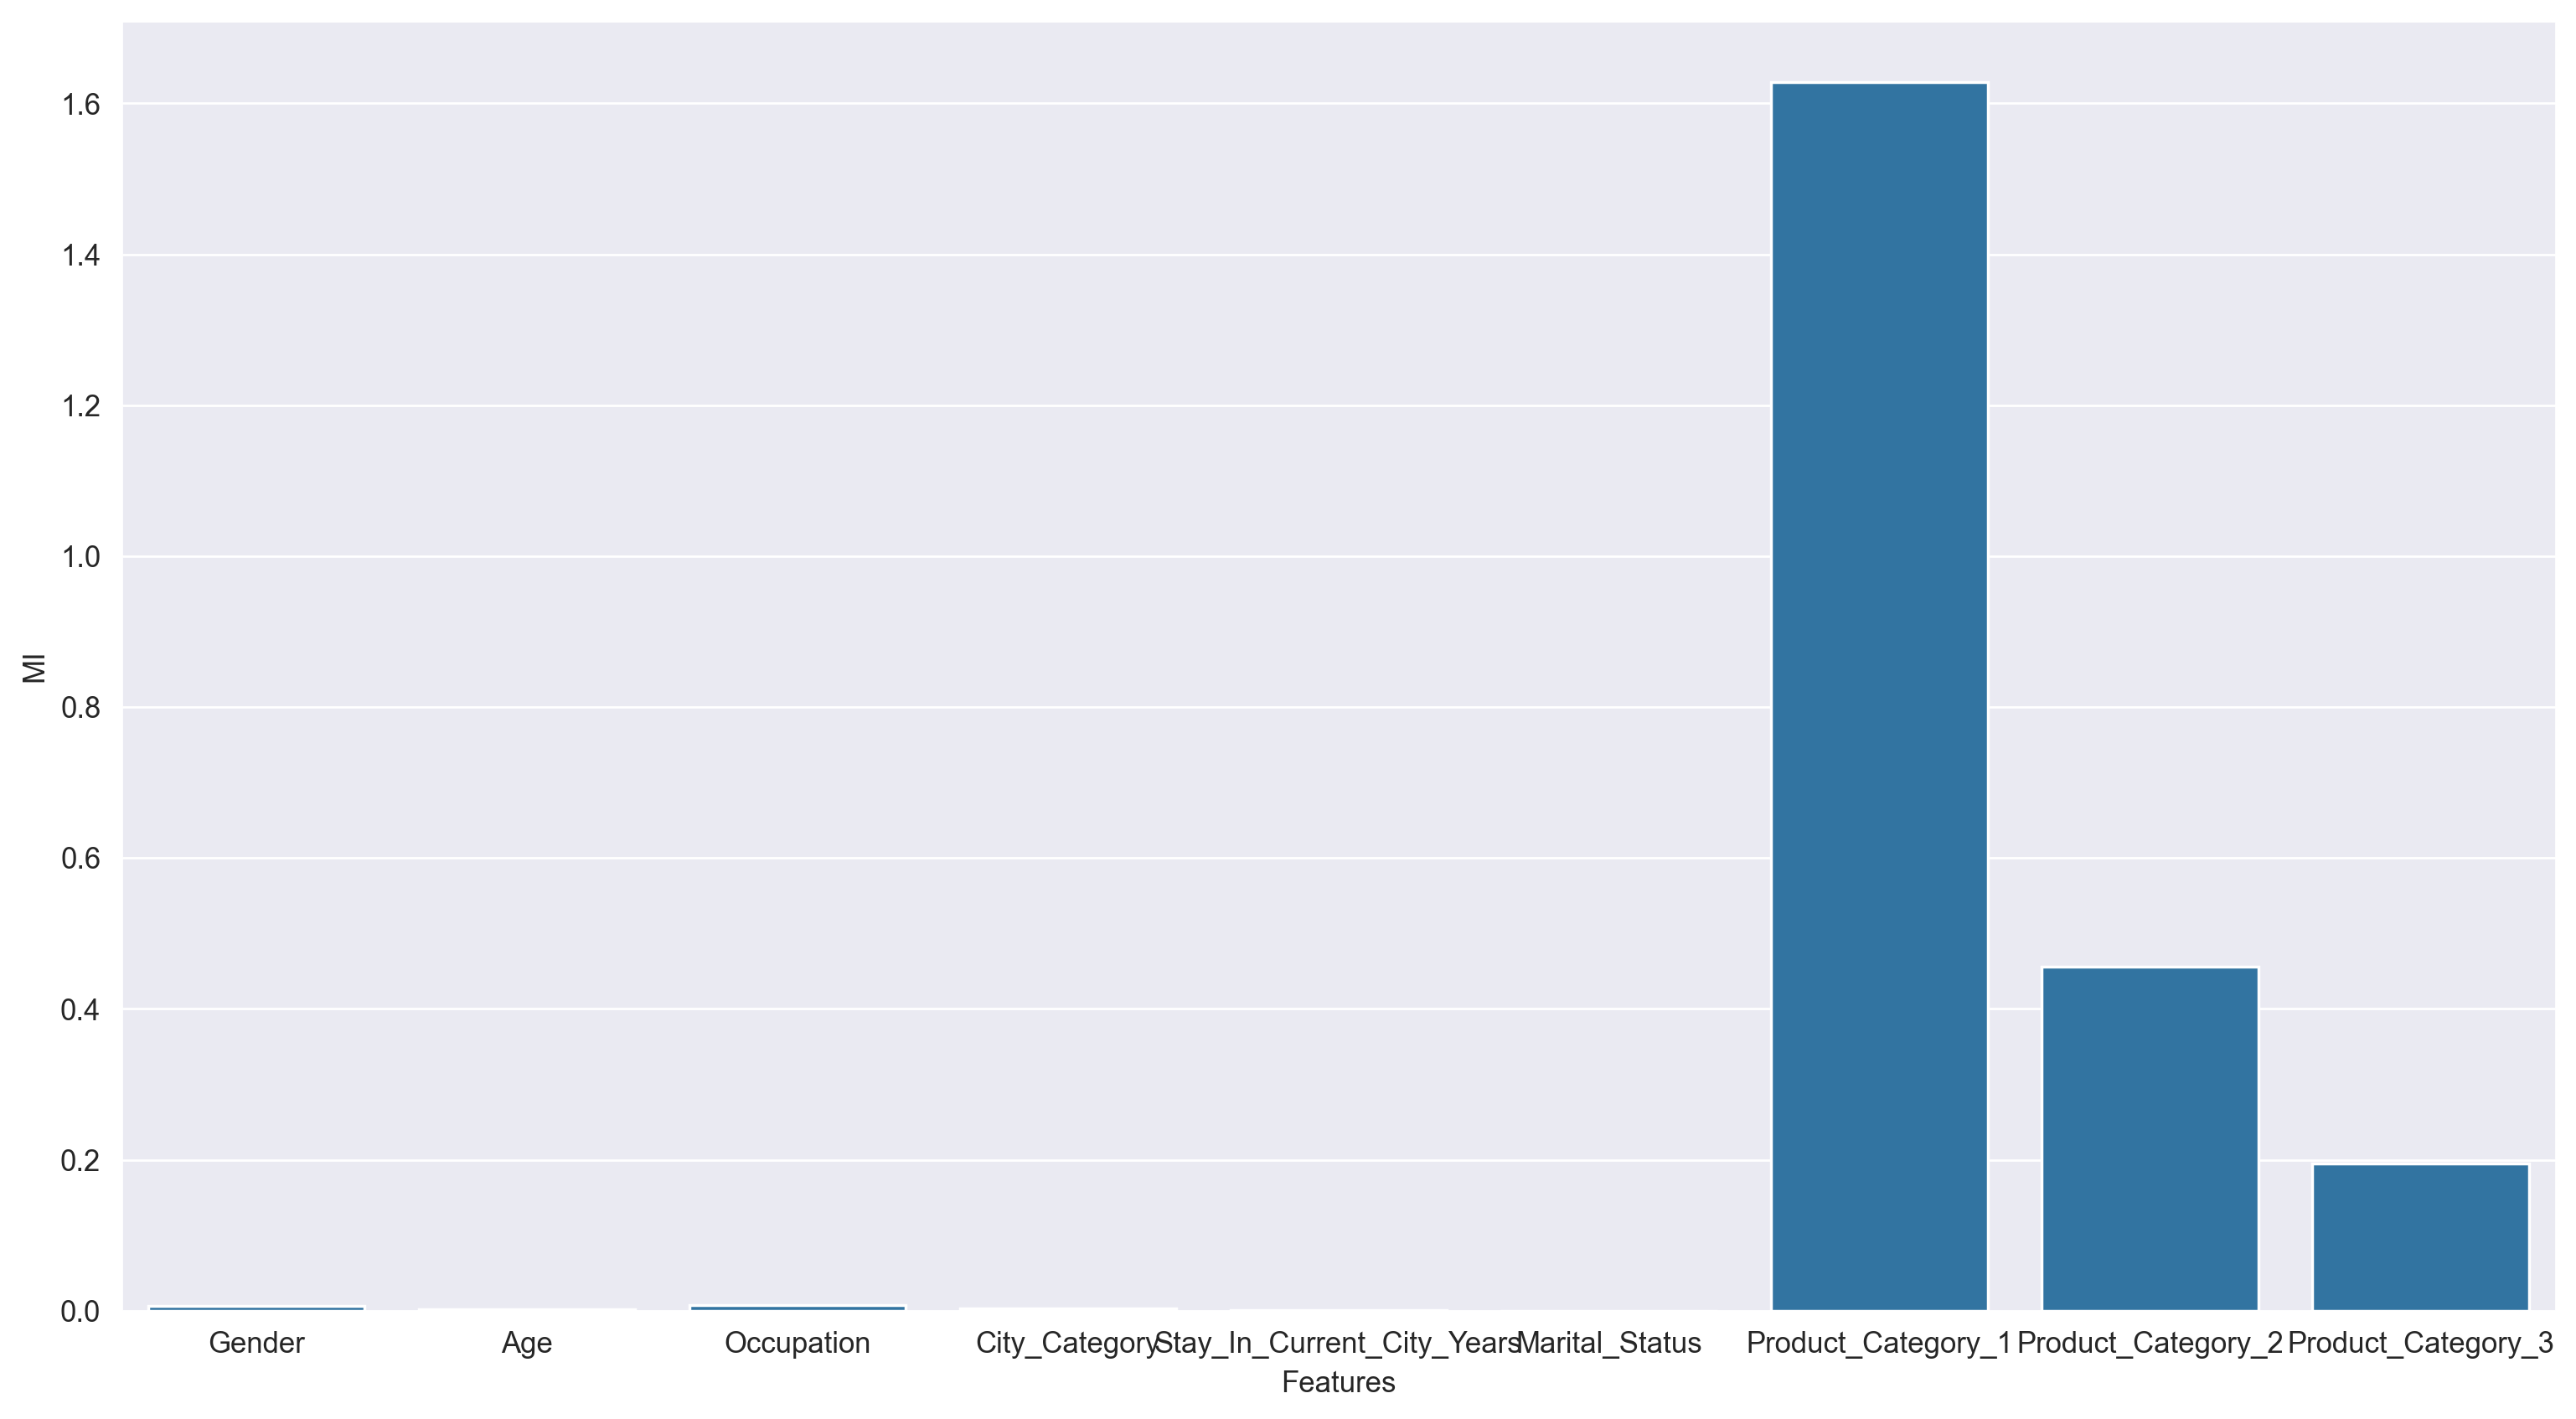

In [32]:
sns.barplot(x = 'Features',
            y = 'MI',
            data = imp_cols)

<Axes: xlabel='Features', ylabel='IG'>

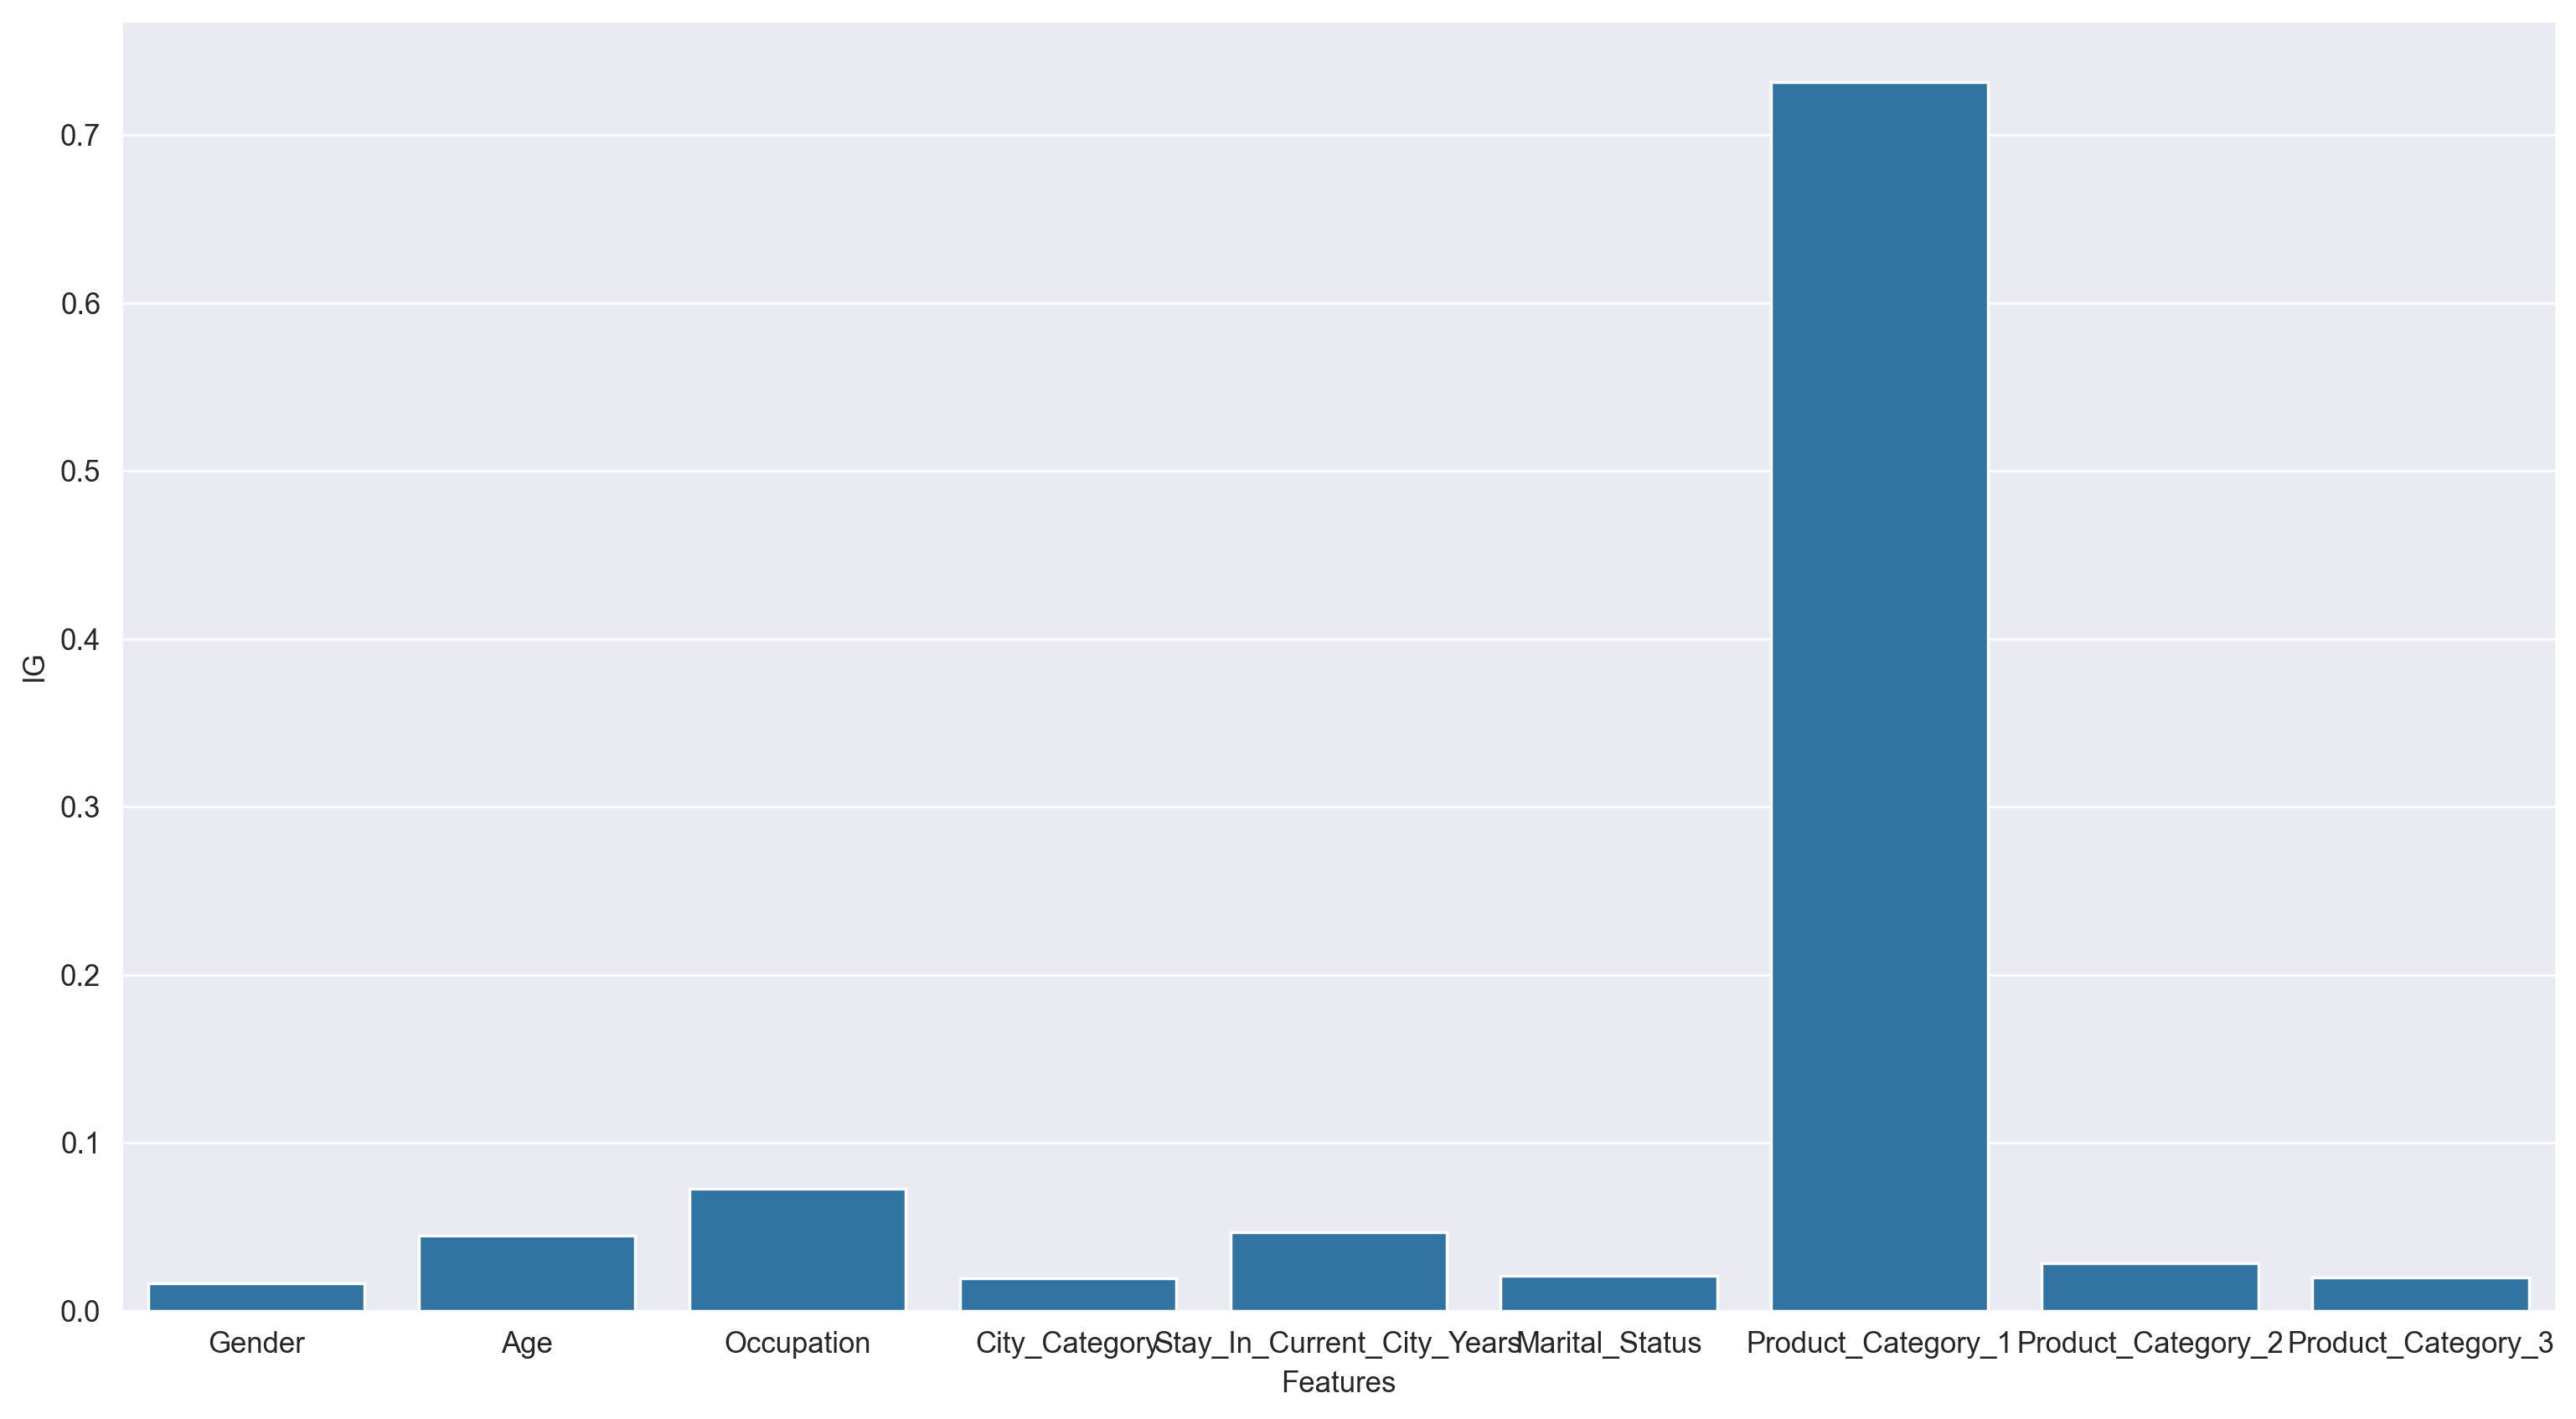

In [33]:
sns.barplot(x = 'Features',
            y = 'IG',
            data = imp_cols)

<Axes: xlabel='Features', ylabel='ET'>

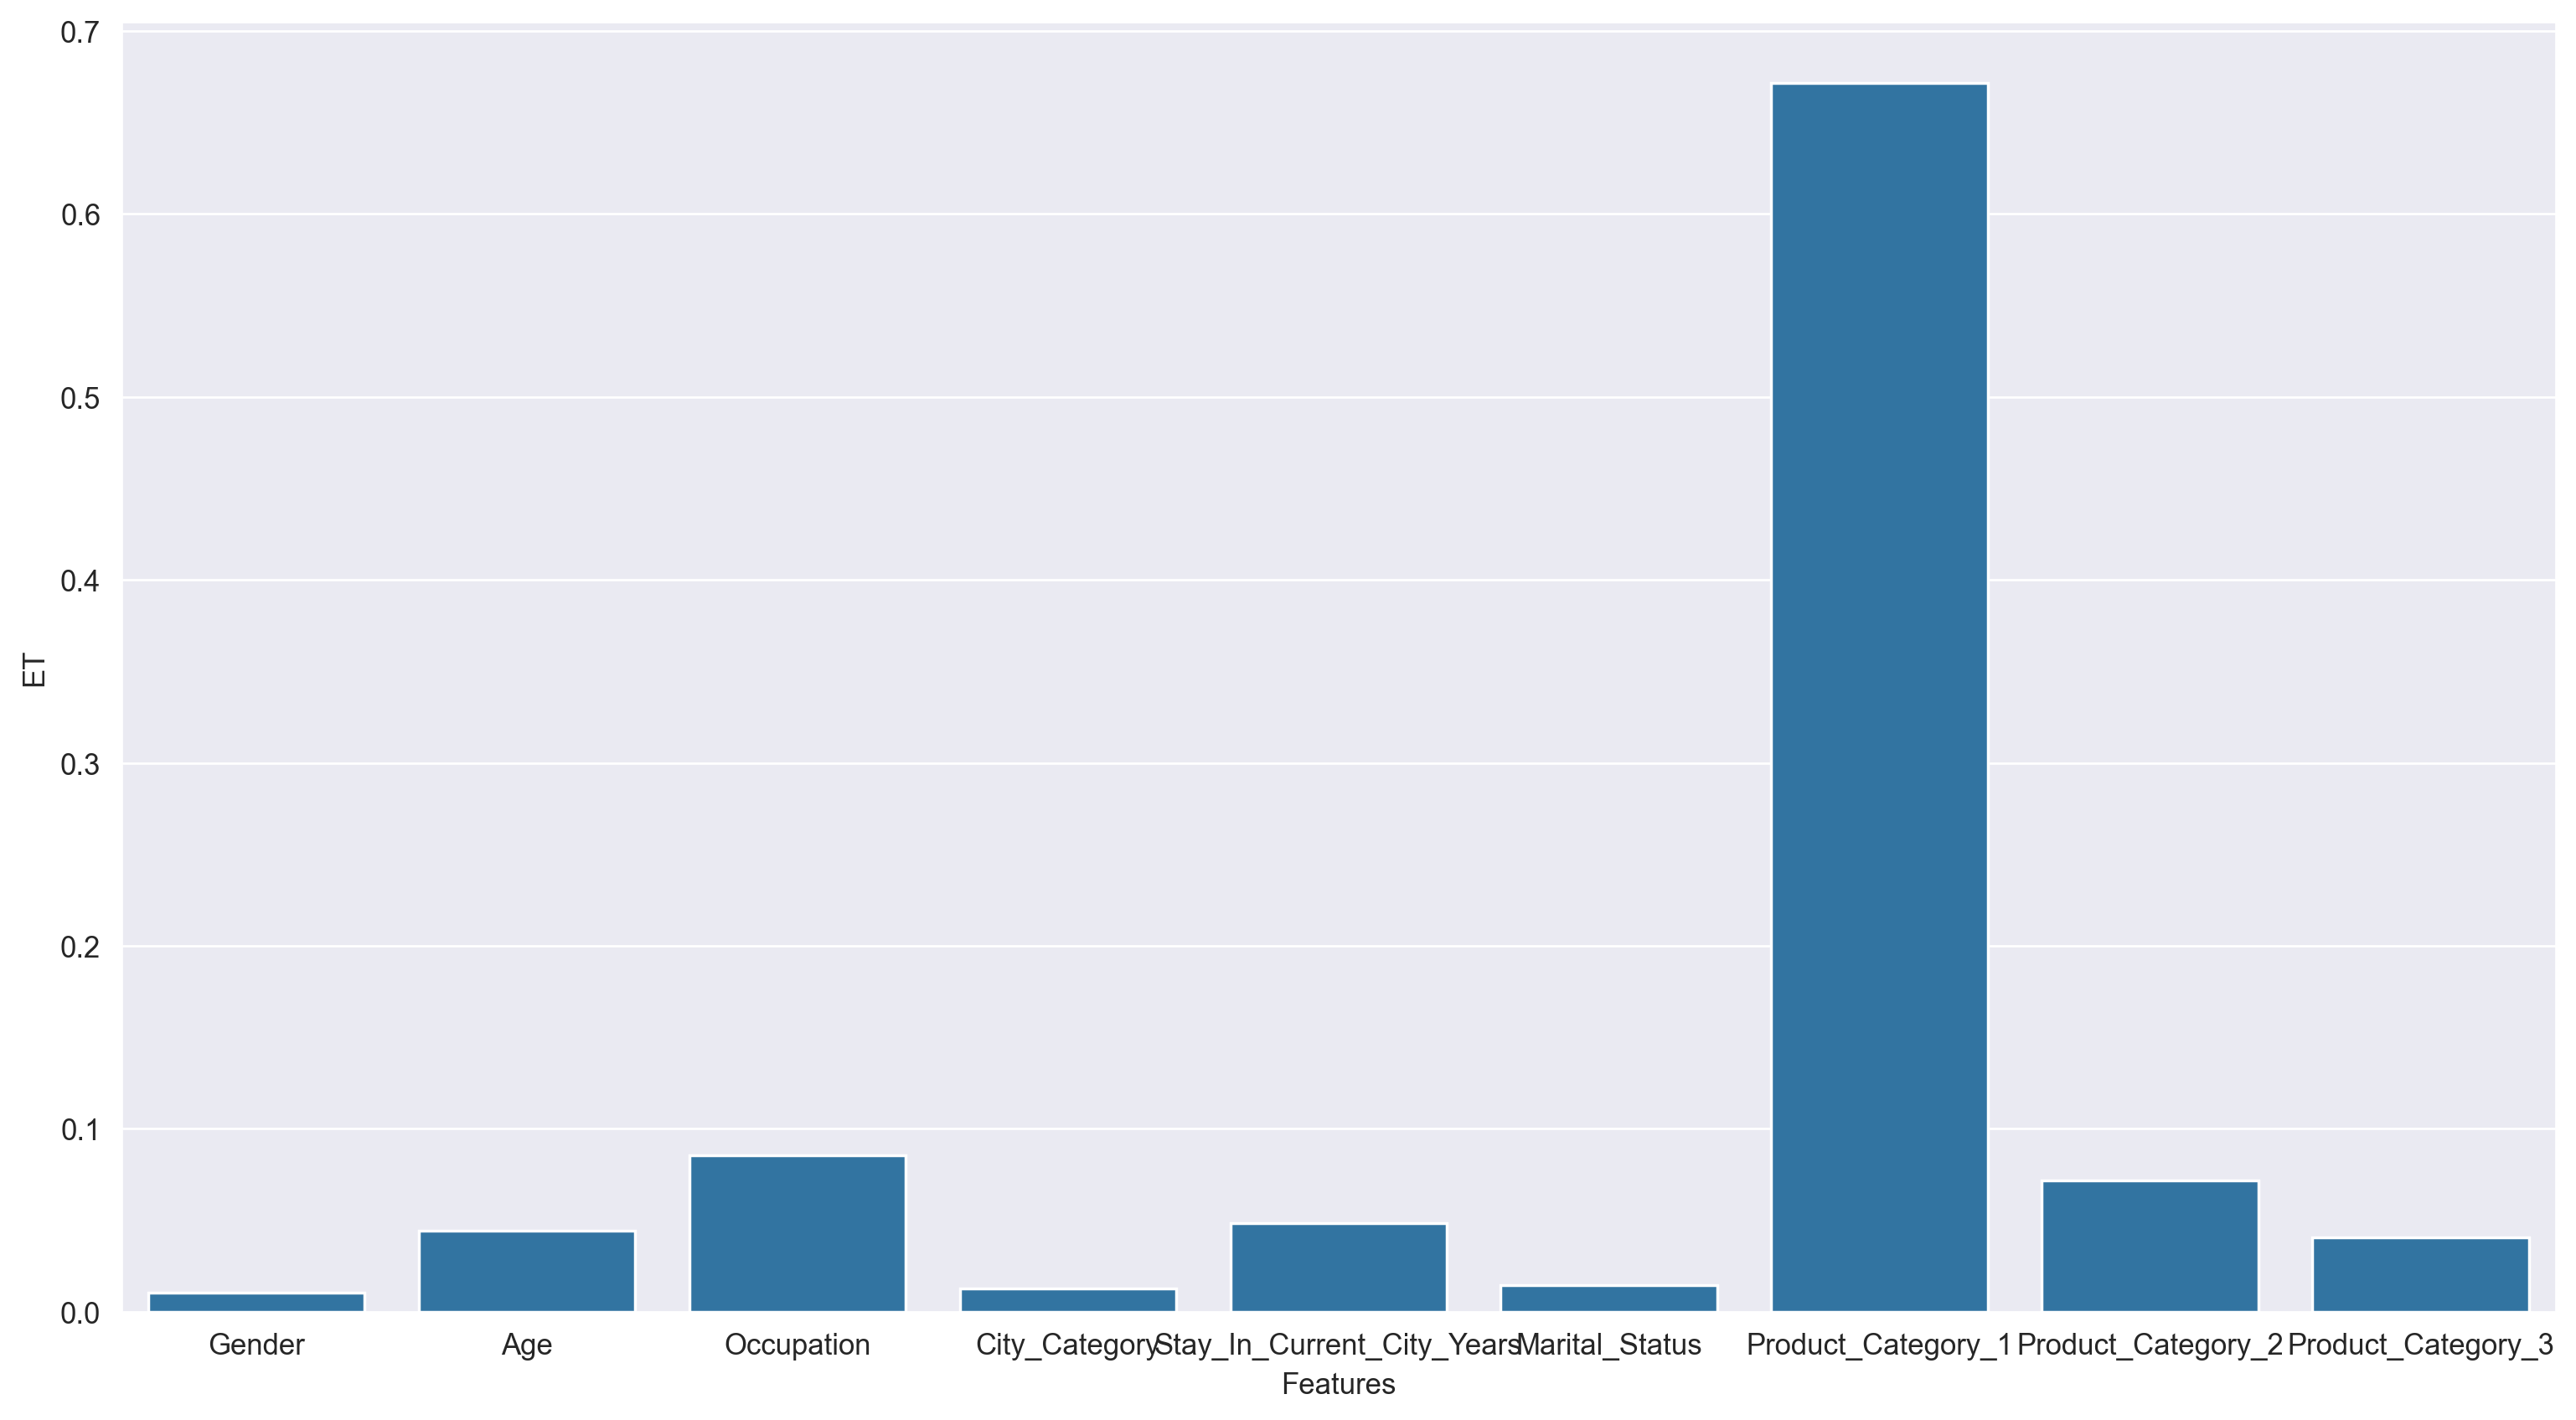

In [34]:
sns.barplot(x = 'Features',
            y = 'ET',
            data = imp_cols)

### Picking Features After Feature Engineering

In [35]:
x.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

x

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,1,10,2,3,8.0,16.0
1,1,10,2,1,6.0,14.0
2,1,10,2,12,8.0,16.0
3,1,10,2,12,14.0,16.0
4,7,16,4,8,8.0,16.0
...,...,...,...,...,...,...
99996,2,4,0,8,8.0,16.0
99997,2,4,0,2,5.0,16.0
99998,2,4,0,5,8.0,16.0
99999,2,4,0,5,8.0,16.0


### Normalizing The Dataset

In [36]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [37]:
scaled_x

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,-1.827262,0.292351,0.103434,-0.616322,-0.296936,0.370842
1,-1.827262,0.292351,0.103434,-1.151850,-0.761597,-0.356934
2,-1.827262,0.292351,0.103434,1.793553,-0.296936,0.370842
3,-1.827262,0.292351,0.103434,1.793553,1.097047,0.370842
4,2.586867,1.211319,1.651862,0.722497,-0.296936,0.370842
...,...,...,...,...,...,...
99996,-1.091574,-0.626617,-1.444994,0.722497,-0.296936,0.370842
99997,-1.091574,-0.626617,-1.444994,-0.884086,-0.993928,0.370842
99998,-1.091574,-0.626617,-1.444994,-0.080794,-0.296936,0.370842
99999,-1.091574,-0.626617,-1.444994,-0.080794,-0.296936,0.370842


### Exporting Dataframe

In [38]:
# scaled_x.to_csv('x.csv', index=False)
# y.to_csv('y.csv', index=False)